In [18]:
import nbimporter
import dataGen
import stats_employees_m1
import pandas as pd
import names
import numpy as np
import matplotlib.pyplot as plt


from pylab import plot, show, axis, subplot, xlabel, ylabel, grid

import math
import random

%matplotlib inline

# Correlates for Metric1 - Job Performance

In [19]:
# Transform features, takes the raw correlated features and fits them into a proper range and bounds.
def transformFeatures(correlatedFeatures):
    education = np.round(correlatedFeatures[0] * .3, 2)
    gpa = np.round(correlatedFeatures[1] * .2 + 3, 2) # GPA
    # techApt = imposeBoundaries(y[3] / 3 + 2, 0, 4) # Technical Aptitude
    educationalPrestige = np.round(correlatedFeatures[2] / 3 + 2, 1)
    # softSkills = imposeBoundaries(y[4] / 3 + 3, 0, 5) # Soft Skills
    softSkills = np.round(correlatedFeatures[3] / 3 + 3, 2)
    # yearsOfExperience = negsToZero(y[5] + 4) # Years of Experience
    yearsOfExperience = np.round(correlatedFeatures[4] + 4, 1)
    return education, gpa, educationalPrestige, softSkills, yearsOfExperience

In [20]:
employeeData = pd.DataFrame()
gender = "female"
race = "Asian"
numPpl = stats_employees_m1.loadPpl(race, gender)
numPpl

120

[[10.0021    6.23373   4.19849   3.2561    7.26461   5.2858  ]
 [ 6.23373   6.346149  1.377637  1.75      3.291293  3.996   ]
 [ 4.19849   1.377637  5.906381  1.2386    3.992109  1.9011  ]
 [ 3.2561    1.75      1.2386    6.672401  2.99991   0.35139 ]
 [ 7.26461   3.291293  3.992109  2.99991   6.266301  4.33896 ]
 [ 5.2858    3.996     1.9011    0.35139   4.33896   6.597104]]
[2.61133594e+01 3.47938463e-03 1.44985390e+00 2.53764659e+00
 5.14437724e+00 6.54171944e+00]


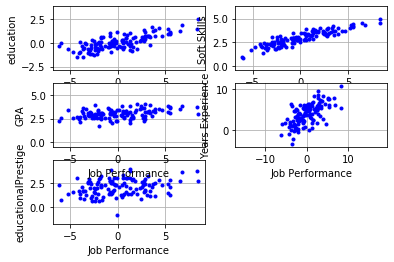

In [21]:
matrix = [
         [1.3, .1, -1.1, 1.5, 1.5, 1.61],
         [1.0, -1., .3, 1.5, 1.01, .993],
         [1.1, .8, -1.1, 1.01, -1, .909],
         [1.1, 0.2, -1.001, 1.1, .98, -1.5],
         [1.05, 1.02, -1.01, 1.02, 1.03, 1.001],
         [1.03 , .998, 1.01,.9, 1.01, 1.3],
         ]
jobPerf, correlatedFeatures = dataGen.featuresCorrelatingToMetric(numPpl, matrix, numVars=6)
education, gpa, educationalPrestige, softSkills, yearsOfExp = transformFeatures(correlatedFeatures)
# Plot various projections of the samples.
subplot(3,2,5)
plot(jobPerf, educationalPrestige, 'b.')
xlabel("Job Performance")
ylabel("educationalPrestige")
axis('equal')
grid(True)

subplot(3,2,1)
plot(jobPerf, education, 'b.')
ylabel('education')
axis('equal')
grid(True)

subplot(3,2,2) 
plot(jobPerf, softSkills, 'b.')
ylabel("Soft Skills")
axis('equal')
grid(True)

subplot(3,2,3)
plot(jobPerf, gpa, 'b.')
xlabel('Job Performance')
ylabel('GPA')
axis('equal')
grid(True)

subplot(3,2,4)
plot(jobPerf, yearsOfExp, 'b.')
xlabel('Job Performance')
ylabel('Years Experience')
axis('equal')
grid(True)

show()

In [22]:
employeeData["Education"] = education
employeeData["GPA"] = gpa
employeeData["Educational Prestige"] = educationalPrestige
employeeData["Years of Experience"] = yearsOfExp
employeeData["Soft Skills"] = softSkills
employeeData["Manager's Assessment Score"] = np.round(jobPerf, 2)


# Generating Correlates for Metric2 - Job Tenure

In [23]:
def transformTenureCorrelates(jobTenure, correlatesToTenure):
    jobTenure = np.round(dataGen.negsToZero(jobTenure + 3), 1)
    militaryTenure = np.round(dataGen.negsToZero(correlatesToTenure[0] * .5 + 2), 1) # militaryTenure
    commuteTime = np.round(dataGen.negsToOpp(correlatesToTenure[1] * 10 + 30), 0)# commuteTime
    culturalFit = np.round(correlatesToTenure[2], 2)
    return jobTenure, militaryTenure, commuteTime, culturalFit

[[ 4.86  4.96 -2.72  4.19]
 [ 4.96  5.19 -2.29  4.28]
 [-2.72 -2.29  7.09 -1.97]
 [ 4.19  4.28 -1.97  3.66]]
[1.55382437e+01 5.17440585e+00 4.36191993e-03 8.29885059e-02]


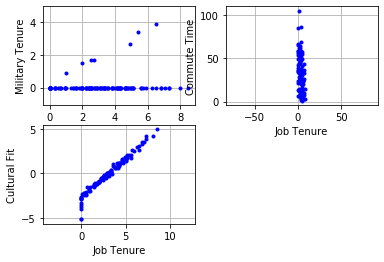

In [25]:
matrix = [
        [  1.20, 1.00, 1.10, 1.10],
        [ 1.00,  .90, 1.30, 1.3],
        [ -1.20,  -1.50,  -1.20, 1.4],
        [1.00, .9, .8, 1.1]
    ]

jobTenure, correlatesToTenure = featuresCorrelatingToMetric(numPpl, matrix , numVars=4)
# print(len(jobTenure))
jobTenure, militaryTenure, commuteTime, culturalFit = transformTenureCorrelates(jobTenure, correlatesToTenure)

# Need to make it such that most military time = 0.
for x in range(len(militaryTenure)):
    if np.random.uniform(0, 1) < .9:
        militaryTenure[x] = 0
        
employeeData["Military Tenure"] = militaryTenure
employeeData["Avg Commute Time"] = commuteTime
employeeData["Job Tenure"] = jobTenure
employeeData["Cultural Fit"] = culturalFit


subplot(2, 2, 1)
plot(jobTenure, militaryTenure, 'b.')
xlabel('Job Tenure')
ylabel('Military Tenure')
axis('equal')
grid(True)


subplot(2, 2, 2)
plot(jobTenure, commuteTime, 'b.')
xlabel('Job Tenure')
ylabel('Commute Time')
axis('equal')
grid(True)

subplot(2, 2, 3)
plot(jobTenure, culturalFit, 'b.')
xlabel('Job Tenure')
ylabel('Cultural Fit')
axis('equal')
grid(True)

show()

# Generating Correlates for Metric3 - Deals Closed


In [13]:
#  Insert another metric # 
matrix_dealsClosed = [
    [1.3, .1, 1.1, 1.5],
    [1.0, 1., .3, 1.5],
    [1.1, .8, 1.1, 1.01],
    [1.1, 0.2, 1.001, 1.1],
]
dealsClosed, correlatesToDealsClosed = featuresCorrelatingToMetric(numPpl, matrix_dealsClosed , numVars=4)

[[5.16     3.98     4.235    4.2011  ]
 [3.98     4.34     3.745    3.2503  ]
 [4.235    3.745    4.0801   3.5821  ]
 [4.2011   3.2503   3.5821   3.462001]]
[1.58390244e+01 9.07804471e-01 9.50316454e-04 2.94321773e-01]


[13.01 11.96 14.39 13.87 10.06 13.34 13.4  15.99 16.49 11.36 11.79 16.26
 16.86 12.74 11.18 15.52  9.87 17.96 16.35 14.04 14.04 13.6  14.96 14.59
 14.59 13.77  9.98 11.35 11.81 14.75 13.27 15.8  15.36 13.88 14.99 14.27
 14.88 12.83 18.54 12.39 17.23 12.55 14.81 17.85 10.41 15.56 13.31 13.84
 18.37 14.4  17.76 17.49 14.94 15.98  7.   12.66 15.36 14.41 14.4  15.05
 17.43 17.95 14.27 15.23 12.94 18.2  18.29 14.83 16.28 11.61 15.21 12.88
  7.   12.93 12.36 14.29 11.55 14.86 15.67  9.77 13.01 17.2  11.55 13.03
 12.1  16.24 15.59 13.88 16.77 10.69 10.82 14.61 12.14 14.89 15.51 15.11
 12.17 16.17 11.83 16.43 17.03 14.75 15.61 15.01 16.63 13.12 14.68 14.47
 15.07 18.99  8.45 16.2  14.19 14.61 11.8   8.37 13.29  9.81 15.2  16.66]


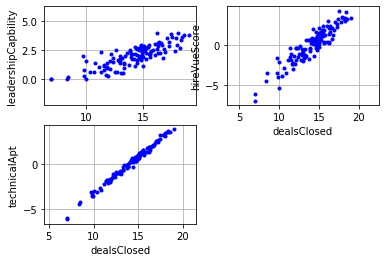

In [26]:
def transformDealCorrelates(dealsClosed, correlatesToDeals):
    dealsClosed = np.round(dataGen.negsToZero(dealsClosed + 7), 2)
    leadershipCapability = np.round(dataGen.negsToZero(correlatesToDeals[0] * .5 + 2), 2) # leadership
    hirevueScore = np.round(correlatesToDeals[1], 2) # hireVue
    technicalApt = np.round(correlatesToDeals[2], 2) # technical aptitude
    return dealsClosed, leadershipCapability, hirevueScore, technicalApt


dealsClosed, leadershipCapability, hirevueScore, technicalApt = transformDealCorrelates(dealsClosed, correlatesToDealsClosed)
employeeData["Leadership Capability"] = leadershipCapability
employeeData["HireVue Score"] = hirevueScore
employeeData["Technical Aptitude"] = technicalApt
employeeData["Avg Deals Closed"] = dealsClosed


subplot(2, 2, 1)
plot(dealsClosed, leadershipCapability, 'b.')
xlabel('dealsClosed')
ylabel('leadershipCapbility')
axis('equal')
grid(True)


subplot(2, 2, 2)
plot(dealsClosed, hirevueScore, 'b.')
xlabel('dealsClosed')
ylabel('hireVueScore')
axis('equal')
grid(True)

subplot(2, 2, 3)
plot(dealsClosed, technicalApt, 'b.')
xlabel('dealsClosed')
ylabel('technicalApt')
axis('equal')
grid(True)

print(dealsClosed)

In [17]:
percentileToNum = math.floor(.20 * numPpl)
numOfReferrals = math.floor(.25 * numPpl)
top, leftover = dataGen.getTopIndxs(jobPerf, percentileToNum)

employeeData["Undergraduate Degree"] =  dataGen.genDegreeTypes(numPpl, jobPerf, education, "biased")   
employeeData["LinkedIn Score"] = dataGen.genLinkedinScore(numPpl, jobPerf)
employeeData["Responsible Social Media Use"] = dataGen.responsibleSocMediaUse(numPpl, jobPerf)
employeeData["Employee Referral"] = dataGen.genEmployeeReferrals(numPpl, top, leftover, .85, numOfReferrals) 
employeeData["Arrest Record"] = dataGen.genArrestRecords(numPpl, jobPerf)
employeeData["Criminal Record"] = dataGen.genCriminalRecords(numPpl, jobPerf)
employeeData["Names"] = [names.get_full_name(gender = gender) for x in range(numPpl)]
employeeData["Race"] = [race for x in range(numPpl)]
employeeData["Gender"] = [gender for x in range(numPpl)] 
employeeData["Sports"] = dataGen.genSportScores(numPpl, jobPerf)
employeeData["Birth Origin"] = dataGen.genBirthOrigin(numPpl, ["USA", "China", "Australia", "Canada"], [.80, .10, .05, .05])
employeeData["Age"] = dataGen.genAge(numPpl, employeeData["Years of Experience"], employeeData["Military Tenure"], employeeData["Job Tenure"])
employeeData["Zip"] = dataGen.genZips(employeeData)

(120,)


ValueError: could not convert string to float: 'NCAA'

In [44]:
employeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Education                     120 non-null    float64
 1   GPA                           120 non-null    float64
 2   Educational Prestige          120 non-null    float64
 3   Years of Experience           120 non-null    float64
 4   Soft Skills                   120 non-null    float64
 5   Manager's Assessment Score    120 non-null    float64
 6   Military Tenure               120 non-null    float64
 7   Avg Commute Time              120 non-null    float64
 8   Job Tenure                    120 non-null    float64
 9   Cultural Fit                  120 non-null    float64
 10  Leadership Capability         120 non-null    float64
 11  HireVue Score                 120 non-null    float64
 12  Technical Aptitude            120 non-null    float64
 13  Avg D

In [45]:
employeeData.to_csv("employeeData_" + gender + "_" + race + ".csv")